<a href="https://colab.research.google.com/github/tejgithubpatil/Twitter-Sentimental-Analysis-Project-NLP-Machine-Learning/blob/main/Twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.shape

(31962, 3)

In [ ]:
df['tweet']=df['tweet'].str.lower()
print(df)


          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# stem the words
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()


In [ ]:
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [Lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drag, k...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drag kid int...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# !pip install wordcloud

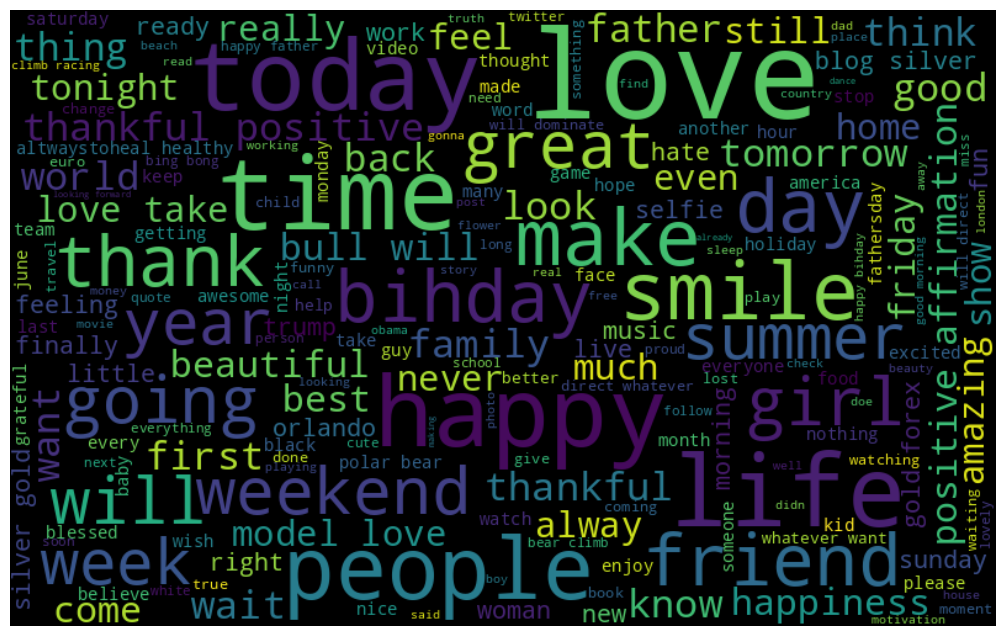

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

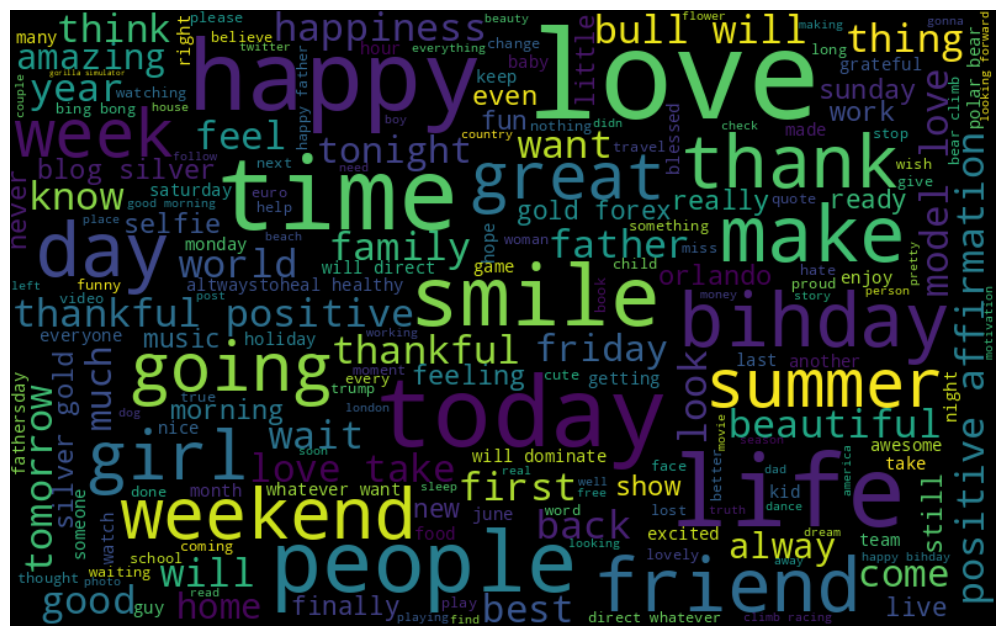

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

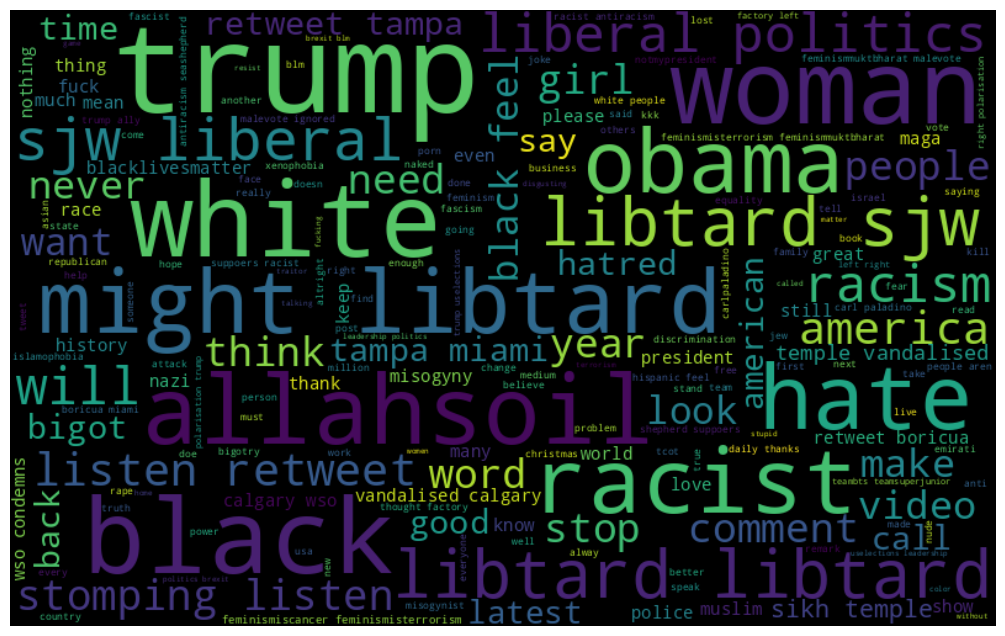

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [ ]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365


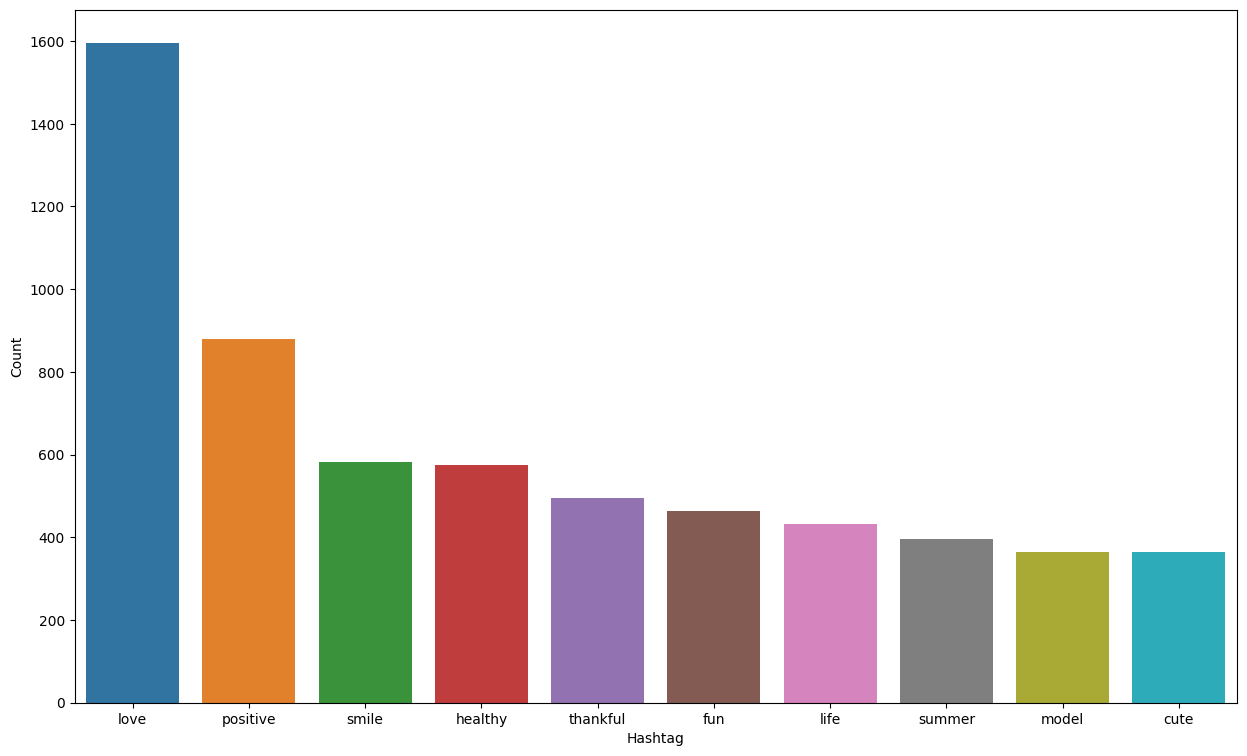

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


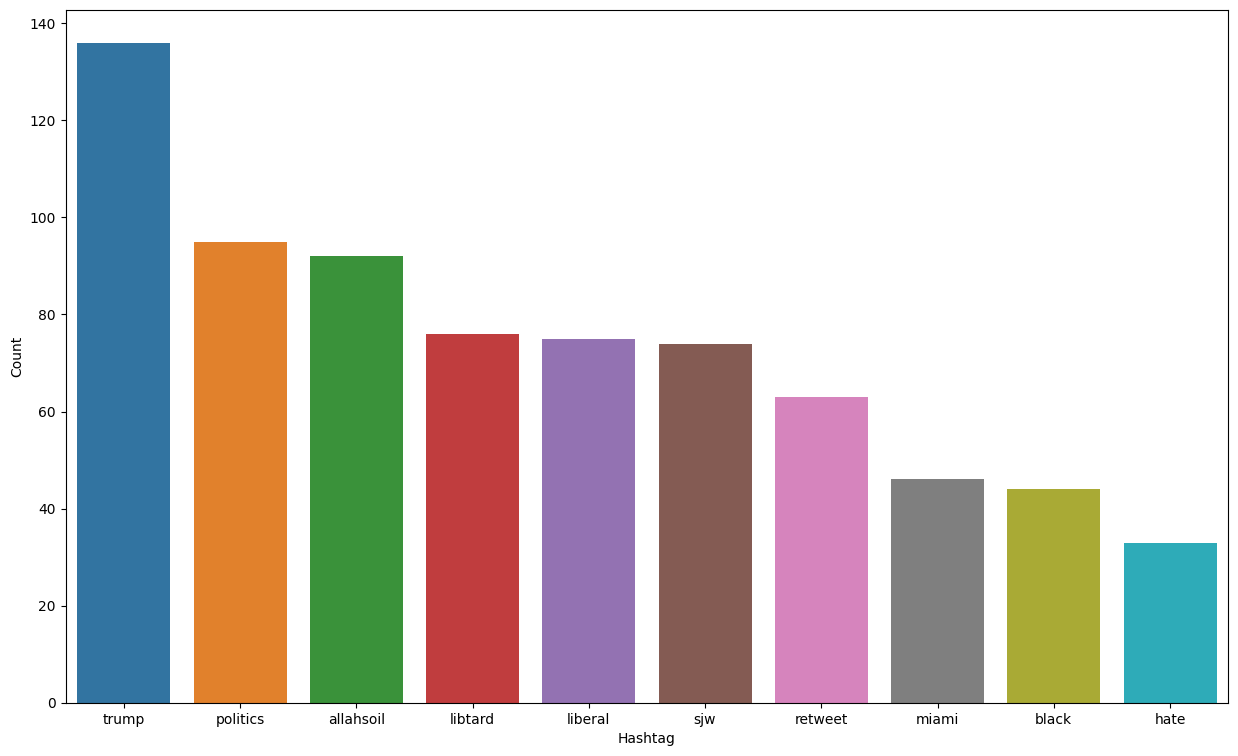

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
# bow[0].toarray()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', None],'C':[1,2,1.5]}

In [ ]:
# training
model = LogisticRegression()
cv=GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=10)
cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 1.5],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [ ]:
# testing
#make predicction
y_train_pre=cv.predict(x_train)
y_test_pre=cv.predict(x_test)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test,y_test_pre))
print("Score: ",round(accuracy_score(y_test,y_test_pre)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_test_pre))


Confusion Matrix for Logistic Regression:
[[7362   70]
 [ 366  193]]
Score:  94.54
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.73      0.35      0.47       559

    accuracy                           0.95      7991
   macro avg       0.84      0.67      0.72      7991
weighted avg       0.94      0.95      0.94      7991



In [ ]:
#training
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_train,y_train_pre))
print("Score: ",round(accuracy_score(y_train,y_train_pre)*100,2))
print("Classification Report:")
print(classification_report(y_train,y_train_pre))

Confusion Matrix for Logistic Regression:
[[22169   119]
 [ 1027   656]]
Score:  95.22
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22288
           1       0.85      0.39      0.53      1683

    accuracy                           0.95     23971
   macro avg       0.90      0.69      0.75     23971
weighted avg       0.95      0.95      0.94     23971



In [ ]:
# use probability to get output
pred_prob = cv.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5254582484725052

In [ ]:
accuracy_score(y_test,pred)

0.9416843949443123

In [ ]:
pred_prob[0][1] >= 0.3

False

In [ ]:
parameter={'criterion':['ginni','entropy','log_loss'],'splitter':['best','random'],'max_depth':[17,20,24,26],'max_features':['auto','sqrt','log2']}

**#Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv=GridSearchCV(dt,param_grid=parameter,scoring='accuracy',cv=10)
cv.fit(x_train,y_train)
#make predicction
y_train_predd=cv.predict(x_train)
y_test_predd=cv.predict(x_test)
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test,y_test_predd))
print("Score: ",round(accuracy_score(y_test,y_test_predd)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_test_predd))


Confusion Matrix for Decision Tree Classifier:
[[7418   14]
 [ 468   91]]
Score:  93.97
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7432
           1       0.87      0.16      0.27       559

    accuracy                           0.94      7991
   macro avg       0.90      0.58      0.62      7991
weighted avg       0.94      0.94      0.92      7991



In [ ]:
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_train,y_train_predd))
print("Score: ",round(accuracy_score(y_train,y_train_predd)*100,2))
print("Classification Report:")
print(classification_report(y_train,y_train_predd))

Confusion Matrix for Decision Tree Classifier:
[[22282     6]
 [ 1359   324]]
Score:  94.31
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     22288
           1       0.98      0.19      0.32      1683

    accuracy                           0.94     23971
   macro avg       0.96      0.60      0.65     23971
weighted avg       0.95      0.94      0.92     23971



In [ ]:
param_grid={'n_estimators':[5,10,15],'max_samples':[0.5,0.75,1.0],'max_depth':[10,12,14,None],'max_features':[0.2,0.5,'auto']}

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
cv=GridSearchCV(estimator=rmfr,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
cv.fit(x_train,y_train)
#make predicction
y_train_pred=cv.predict(x_train)
y_test_pred=cv.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,y_test_pred))
print("Score: ",round(accuracy_score(y_test,y_test_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_test_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Confusion Matrix for Random Forest Classifier:
[[7384   48]
 [ 389  170]]
Score:  94.53
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.78      0.30      0.44       559

    accuracy                           0.95      7991
   macro avg       0.86      0.65      0.70      7991
weighted avg       0.94      0.95      0.93      7991



In [ ]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_train,y_train_pred))
print("Score: ",round(accuracy_score(y_train,y_train_pred)*100,2))
print("Classification Report:")
print(classification_report(y_train,y_train_pred))

Confusion Matrix for Random Forest Classifier:
[[22247    41]
 [ 1101   582]]
Score:  95.24
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22288
           1       0.93      0.35      0.50      1683

    accuracy                           0.95     23971
   macro avg       0.94      0.67      0.74     23971
weighted avg       0.95      0.95      0.94     23971



In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train,y_train)
#make predicction
y_train_predd=gbi.predict(x_train)
y_test_predd=gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,y_test_predd))
print("Score: ",round(accuracy_score(y_test,y_test_predd)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_test_predd))


Confusion Matrix for Gradient Boosting Classifier:
[[7376   56]
 [ 369  190]]
Score:  94.68
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.77      0.34      0.47       559

    accuracy                           0.95      7991
   macro avg       0.86      0.67      0.72      7991
weighted avg       0.94      0.95      0.94      7991



In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_train,y_train_predd))
print("Score: ",round(accuracy_score(y_train,y_train_predd)*100,2))
print("Classification Report:")
print(classification_report(y_train,y_train_predd))

Confusion Matrix for Gradient Boosting Classifier:
[[22233    55]
 [ 1028   655]]
Score:  95.48
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22288
           1       0.92      0.39      0.55      1683

    accuracy                           0.95     23971
   macro avg       0.94      0.69      0.76     23971
weighted avg       0.95      0.95      0.95     23971



In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
#make predicction
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,y_test_pred))
print("Score: ",round(accuracy_score(y_test,y_test_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,y_test_pred))

Confusion Matrix for K Neighbors Classifier:
[[7409   23]
 [ 431  128]]
Score:  94.32
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.85      0.23      0.36       559

    accuracy                           0.94      7991
   macro avg       0.90      0.61      0.67      7991
weighted avg       0.94      0.94      0.93      7991



In [ ]:
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_train,y_train_pred))
print("Score: ",round(accuracy_score(y_train,y_train_pred)*100,2))
print("Classification Report:")
print(classification_report(y_train,y_train_pred))

Confusion Matrix for K Neighbors Classifier:
[[22239    49]
 [ 1216   467]]
Score:  94.72
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22288
           1       0.91      0.28      0.42      1683

    accuracy                           0.95     23971
   macro avg       0.93      0.64      0.70     23971
weighted avg       0.95      0.95      0.93     23971

